# 将来の構造予測
グラフ理論は将来の構造を予測するのに非常に役立ちますが、完全な予測を行うことは難しい場合があります。いくつかの方法やツールがありますが、予測の正確さは多くの要因に依存します。例えば、現在のネットワークの特性、モデルの選択、そして未来のネットワークの成長パターンに関する情報の可用性です。

一般的なアプローチとしては、ネットワークの成長モデルや拡散モデルを使用してネットワークの将来の発展を予測することがあります。ただし、これらのモデルはある程度の確率論的な要素を含んでおり、厳密な予測というよりもトレンドやパターンを理解するための手段として用いられることが多いです。

## リンク予測
例えば、リンク予測はネットワークの未知の部分において未来に形成される可能性のあるリンクを推測するタスクです。具体的には、既存のネットワークの一部の情報をもとに、全体のネットワーク構造やリンクのパターンを推測しようとするものです。
リンク予測はさまざまな手法で行われますが一般的なアプローチとしては以下のようなものがあります。<br>

**類似性に基づく手法：** 既存のノードやリンクの類似性を基に未知のリンクを推定します。共通の隣接ノードの数や属性の類似性を考慮する方法があります。

**統計的なモデル：** ネットワーク内のパターンや統計的な特性をモデル化し、そのモデルを使って未来のリンクを推定する方法です。例えば、ネットワークのランダム性やクラスタリング係数などを考慮します。

**機械学習アプローチ：** 機械学習の手法を用いてネットワーク内のパターンを学習し未知のリンクを予測する方法です。例えば、グラフニューラルネットワーク（GNN）を用いた予測が近年注目されています。

リンク予測において**類似度（similarity）** は非常に重要な要素です。類似度を測ることでネットワーク内のノード間の関係性や結びつきの強さを評価し、将来のリンク形成の可能性を推測することができます。リンク予測で用いられる一般的な類似度の測定方法にはいくつかの種類があります。

## 一般的な類似度の測定方法
### 1. 共通の隣接ノード数 (Common Neighbors)
- **2つのノードが共通して持つ隣接ノード（共通の友達）の数を数えます。** 共通の隣接ノードが多いほどリンクが形成される可能性が高いとされます。<br>
- **類似度スコア：**$CN(u,v) = |\Gamma(u) \cap \Gamma(v)|$<br>
    - ここで$Γ(𝑢)$はノード 𝑢 の隣接ノードの集合を表します。<br>
    
- **結果の解釈：**
    - **値が大きい場合：** **共通の隣接ノード数が大きいほど、2つのノード間に多くの共通の隣接ノードが存在する**ことを示します。これは将来的にこの2つのノードがリンクを形成する可能性が高いことを示唆します。これはソーシャルネットワークにおける「三角閉包性」（共通の友人を持つノード同士がリンクを形成しやすいという現象）に基づいています。<br>
    - **値が小さい場合：** **共通の隣接ノード数が小さいかゼロの場合、2つのノードがリンクを形成する可能性は低い**と判断されます。ただし、他の要因（例えばノードの属性や他の類似度指標）を考慮する必要がある場合もあります。<br>
- **利点：** シンプルで計算が容易: 共通の隣接ノード数は計算が非常に簡単で、大規模なネットワークでも効率的に計算できます。<br>
- **制約** <br>
    ・ネットワークが非常に疎である場合、共通の隣接ノード数が小さくなりがちで、予測の精度が低下することがあります。<br> 
    ・次数の極端に大きい頂点は、共通の隣接ノード数が多くなる傾向があり、どの頂点とも類似度が高くなります。<br>
### 2. Jaccard係数 (Jaccard Coefficient)
- **共通の隣接頂点数を全体の隣接頂点数で割ることで、ノードの次数に対する補正を行います。**<br>
- **類似度スコア：**$Jaccard(u,v) = \frac{|\Gamma(u) \cap \Gamma(v)|}{|\Gamma(u) \cup \Gamma(v)|}$<br>

- **結果の解釈：** Jaccard係数が高いほど2つのノードが共通の隣接ノードを多く持つ割合が高いことを示します。したがって、Jaccard係数が高いノードペアは将来的にリンクを形成する可能性が高いと判断できます。<br>
- **利点：** ノード間の類似度を正規化して評価するため、ノードの度数（リンク数）が大きく異なる場合でも公平に比較できます。これにより、ネットワーク内のさまざまな次数のノード間での類似度を正確に評価できます。<br>
- **制約** <br>
    ・ネットワークが非常に疎な状態では、Jaccard係数の分母は比較的小さくなり、Jaccard係数自体が低い値をとることが多くなります。<br>
    ・ネットワークが非常に密な状態では、Jaccard係数の分母は大きくなり、Jaccard係数自体が高い値をとることが多くなります。
### 3. アダムサル係数 (Adamic/Adar Index)
- **共通の隣接頂点の中で次数の少ない頂点を重視する類似度指標です。共通の隣接ノードの数に対して、その隣接ノードの次数の逆対数を重み付けして評価します。**<br>
- **類似度スコア：**$AA(u,v) = \sum_{w \in \Gamma(u) \cap \Gamma(v)} \frac{1}{\log |\Gamma(w)|}$
    - ここで 𝑤 は共通の隣接ノードです。<br>
<br>

- **結果の解釈：** アダムサル係数が高いほど2つのノードは共通の隣接ノードを多く持ち、かつその共通の隣接ノードの度数が少ない（希少な）場合に高いスコアが与えられます。これにより、共通の隣接ノードが希少であるほどリンクが形成される可能性が高いと判断されます。<br>
- **利点：** 共通の隣接ノードの度数の重要性を考慮するため、次数の極端に大きい頂点の影響を受けにくい。特にネットワーク内の重要なノード（ハブ）を無視せずに予測できます。<br>
- **制約** <br>
    ・共通の隣接頂点の中で次数の少ない頂点を重視するため、次数の極端に小さい頂点の影響を受ける可能性があります。<br>
    ・計算コストがやや高く、大規模なネットワークでは計算量が増加することがあります。<br>

### 4. リソース配分インデックス (Resource Allocation Index)
- **ノードが持つリソースを隣接ノードにどれだけ分配するかを評価します。** 共通の隣接ノードに対して次数の逆数を使って重み付けします。共通の隣接ノードの度数が低いほど高いスコアを付与する類似度指標です。このインデックスは、Adamic/Adar係数と同様に、ノードの度数が非常に高い場合の影響を抑えるように設計されています。<br>
- **類似度スコア：**$RA(u,v) = \sum_{w \in \Gamma(u) \cap \Gamma(v)} \frac{1}{|\Gamma(w)|}$<br>

- **結果の解釈：** リソース配分インデックスが高いほど共通の隣接ノードが少ないリンクを持つ（度数が低い）場合に高いスコアが与えられます。これにより、将来的にリンクが形成される可能性が高いと判断されます。
- **利点：** ノードのリソース分配の観点を取り入れているため度数の低いノードの影響を強調します。スパースなネットワークやノードの度数が低い場合でも効果的です。
- **制約** <br>
    ・ノードの度数が非常に高い場合にはスコアが小さくなる（ハブノードの影響を軽減する）傾向があるため、全体のネットワーク構造によっては効果が薄れることがあります。そのため、スケールフリーネットワークでの予測精度が低下する場合があります。<br>
    ・大規模なネットワークに対しては計算コストが増加し、効率が低下する可能性があります。<br>
 
### 5. プレファレンシャルアタッチメント (Preferential Attachment)
- **ノードの次数の積を評価します。** 次数が高いノード同士がリンクしやすいとする考え方で、ネットワークのノードがリンクを形成する際に既存のノードの度数に比例して結合するという原則に基づくモデルです。プレファレンシャルアタッチメントでは、次数が高いノードが新しいリンクを獲得する確率が高くなるため、これらのノードがネットワークの中心的な役割を果たす傾向があります。一方で、低次数頂点はその影響範囲が限定されるため、ネットワーク全体における貢献度は比較的低いです。<br>
- **類似度スコア：**$PA(u,v) = |\Gamma(u)| \cdot |\Gamma(v)|$<br>

- **結果の解釈：** プレファレンシャルアタッチメントのスコアが高いほど度数が高いノード同士がリンクを形成する可能性が高いと判断されます。ノードの度数の積が大きいノードペアは将来的にリンクが形成される可能性が高いです。<br>
- **利点：** 高度数のノードがネットワーク内で重要な役割を果たす場合に有効です。ネットワークの成長過程を捉えやすく、大規模ネットワークに対しても計算が簡単で効率的です。<br>
- **制約：** 度数が高いノード同士のリンク形成を強調するため、度数の低いノード同士のリンク形成を予測する際には効果が薄れることがあります。また、ネットワーク全体の度数分布に依存するため、一部のネットワークでは適用が難しい場合もあります。<br>

## 類似度の重要性
**1. ネットワーク分析における中心的役割**<br>
類似度はネットワーク分析において中心的な役割を果たします。ネットワーク内のノードの関係性を理解し、特定のノードの中心性を評価するために類似度が使用されます。これはソーシャルネットワーク分析、生物学的ネットワーク解析、情報伝播モデリングなど、さまざまな分野で重要です。<br>
<br>
**2. 異常検出とパターン識別**<br>
類似度を使用することでネットワーク内での異常を検出したりパターンを識別したりすることができます。特定の類似度メトリクスの変化が予期せぬネットワークの変化や異常な振る舞いを示す可能性があります。<br>

**3. コミュニティ検出**<br>
類似度はネットワーク内のコミュニティ構造を理解するための重要な手段です。類似したノード同士がクラスターを形成し、それぞれのクラスターが異なるコミュニティを表すことがあります。<br>

**4. ネットワーク可視化と解釈**<br>
類似度はネットワークを視覚化し理解するための有用なツールです。ネットワーク内の類似したノード同士を結びつけることでネットワークの構造を理解しやすくなります。<br>

## 類似度指標の計算
以下のスクリプトはカラテクラブのネットワークを視覚化し、特定のノードペア（4と5）の隣接ノード、次数、共通隣接ノード数、Jaccard係数、Adamic/Adar指数、リソース配分インデックス、プレファレンシャルアタッチメントスコアを計算・出力することで、ノード間の類似度を多角的に評価し、将来的なリンク形成の可能性を予測することを目的としています。<br>

このスクリプトは特定のノードペア（4と5）に対してリンク予測指標を計算し、その結果を出力するものです。このため、個別ペアのリンク予測解析に適しています。もし他のペアに対してリンク予測を行いたい場合は、スクリプト内のノードペア（x, y）の値を変更することで対応できます。<br>
<br>

コンソールに出力される結果は、与えられたカラテクラブのグラフにおいて、頂点 4 と 5 の情報とそれぞれの類似度指標の計算結果を示しています。<br>それぞれの項目について説明します。<br>

**1. Vertex pair: 4 and 5**<br>
・ 対象となる頂点ペアが 4 と 5 であることを示しています。<br>

**2. Neighbors of 4 : [0, 6, 10]**<br>
・ 頂点 4 の隣接するノードのリストです。この場合、ノード 4 に隣接するノードは 0,6,10 です。<br>

**3. Neighbors of 5 : [0, 6, 10, 16]**<br>
・ 頂点 5 の隣接するノードのリストです。この場合、ノード 5 に隣接するノードは 0,6,10,16 です。<br>

**4. Degree of 4 : 3**<br>
・ 頂点 4 の次数（度数）です。 4 に隣接するノードの数は 3 です。<br>

**5. Degree of 5 : 4**<br>
・ 頂点 5 の次数（度数）です。 5 に隣接するノードの数は 4 です。<br>

**6. Common neighbors: 3**<br>
・ 頂点 4 と 5 の共通の隣接ノードの数です。この場合、4 と 5 の共通の隣接ノードは 0,6,10 の3つです。<br>

**7. Jaccard coefficient: 0.75**<br>
・ Jaccard係数です。4 と 5 の間の Jaccard係数は $\frac{|N(4) \cap N(5)|}{|N(4) \cup N(5)|} = \frac{3}{4} = 0.75$です。この値が高いほど 4 と 5 の類似度が高いことを示します。<br>

**8. Adamic/Adar index: 1.9922605072935597**<br>
・ アダムサル係数（Adamic/Adar index）です。 4 と 5 の間のアダムサル係数は$\sum_{u \in N(4) \cap N(5)} \frac{1}{\log(|N(u)|)}$ の値です。この指標も高いほど 4 と 5 の間の接続が強いことを示します。<br>

**9. Resource Allocation Index: 0.6458333333333333**<br>
・ リソース配分インデックスです。 4 と 5 の間のリソース配分インデックスは共通の隣接ノードの度数の逆数の和を表します。この値も高いほど 4 と 5 の間の類似度が高いことを示します。<br>

**10. Preferential attachment score: 12**<br>
・ プレファレンシャルアタッチメントのスコアです。 4 と 5 の間のプレファレンシャルアタッチメントスコアは$|N(4)| \times |N(5)|$ を示します。この値が大きいほど 4 と 5 の間に多くのエッジが生成される可能性が高いことを示します。

Vertex pair: 4 and 5
Neighbors of 4 : [0, 6, 10]
Neighbors of 5 : [0, 6, 10, 16]
Degree of 4 : 3
Degree of 5 : 4
Common neighbors: 3
Jaccard coefficient: 0.75
Adamic/Adar index: 1.9922605072935597
Resource Allocation Index: 0.6458333333333333
Preferential attachment score: 12


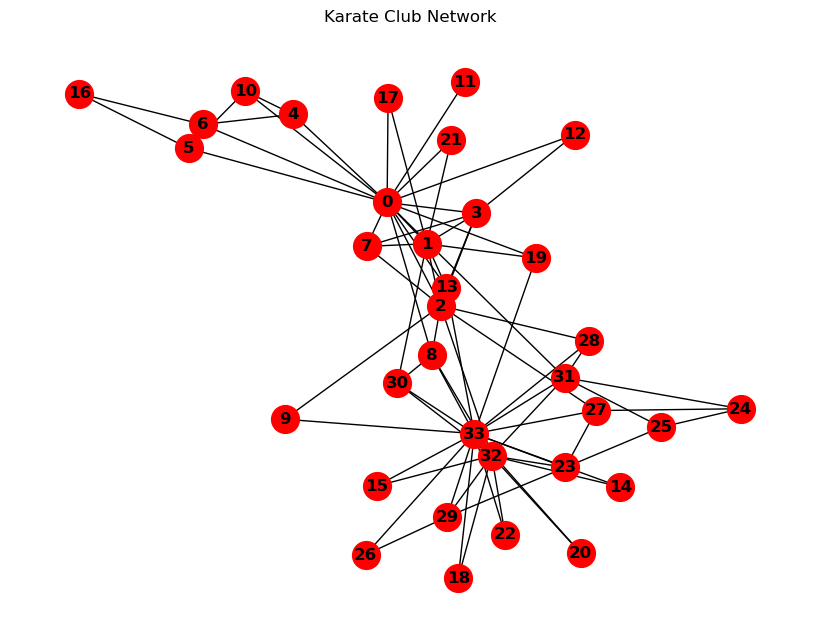

In [5]:
import networkx as nx
import matplotlib.pyplot as plt

# カラテクラブのグラフを作成
G = nx.karate_club_graph()

# グラフの描画
plt.figure(figsize=(8, 6))  # 図のサイズを適宜変更
nx.draw_spring(G, node_size=400, node_color='red', with_labels=True, font_weight='bold')
plt.title("Karate Club Network")  # グラフにタイトルを追加

# ノードのペアとその情報の出力
x = 4
y = 5
print("Vertex pair:", x, "and", y)
print("Neighbors of", x, ":", list(G.neighbors(x)))
print("Neighbors of", y, ":", list(G.neighbors(y)))
print("Degree of", x, ":", G.degree(x))
print("Degree of", y, ":", G.degree(y))

# 共通の隣接ノード数や類似度指標の計算と出力
common_neighbors = len(list(nx.common_neighbors(G, x, y)))
print("Common neighbors:", common_neighbors)

# Jaccard係数の計算と出力
jaccard_coefficient = list(nx.jaccard_coefficient(G, [(x, y)]))[0][2]
print("Jaccard coefficient:", jaccard_coefficient)

# アダムサル係数の計算と出力
adamic_adar = list(nx.adamic_adar_index(G, [(x, y)]))[0][2]
print("Adamic/Adar index:", adamic_adar)

# リソース配分インデックスの計算と出力
resource_allocation = list(nx.resource_allocation_index(G, [(x, y)]))[0][2]
print("Resource Allocation Index:", resource_allocation)

# プレファレンシャルアタッチメントの計算と出力
preferential_attachment = list(nx.preferential_attachment(G, [(x, y)]))[0][2]
print("Preferential attachment score:", preferential_attachment)

# グラフの表示
plt.show()


以下のスクリプトは、グラフ全体に対してリンク予測指標を計算し、上位の結果を出力します。<br>
コンソールの結果は以下のように解釈します。

**共通の近傍数が多い場合：** 二つのノードが多くの共通の隣接ノードを持つと、それらのノードが結びつく可能性が高いとされます。<br>

**Jaccard係数が高い場合：** Jaccard係数が1に近い場合、二つのノードが非常に類似しており、そのため新たなエッジが形成される可能性が高いとされます。<br>

**Adamic/Adar指数が高い場合：** Adamic/Adar指数が高いと、そのノードペア間の共通の隣接ノードが重要な役割を果たしていると考えられ、新たなリンクが形成される可能性が高まります。<br>

**優先的アタッチメントスコアが高い場合：** ネットワーク内でのノードの結びつきが強い場合、新たなノードが追加される際にも既存の結びつきの強いノードと結びつく傾向があります。<br>

**リソース配分インデックスが高い場合：** リソース配分インデックスが高いと、そのノードが持つリソース（共通の隣接ノードや結びつきの強さなど）が多く、それが新たなリンク形成に寄与する可能性があります。<br>

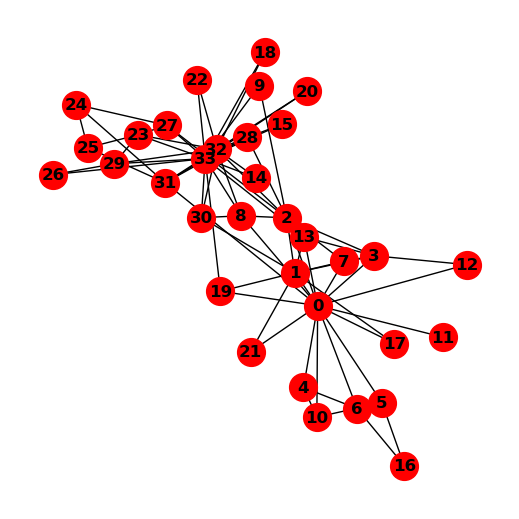

Common Neighbors
[(2, 33, 6), (0, 33, 4), (7, 13, 4), (0, 32, 3), (1, 8, 3), (1, 33, 3), (2, 30, 3), (2, 31, 3), (4, 5, 3), (6, 10, 3)]
Jaccard Coefficient
[(14, 15, 1.0), (14, 18, 1.0), (14, 20, 1.0), (14, 22, 1.0), (15, 18, 1.0), (15, 20, 1.0), (15, 22, 1.0), (17, 21, 1.0), (18, 20, 1.0), (18, 22, 1.0)]
Adamic/Adar
[(2, 33, 4.719381261461351), (0, 33, 2.7110197222973085), (1, 33, 2.252921681630931), (4, 5, 1.9922605072935597), (6, 10, 1.9922605072935597), (7, 13, 1.8081984819901584), (2, 31, 1.6733425912309228), (23, 31, 1.6656249548734432), (23, 24, 1.631586747071319), (0, 32, 1.613740043014111)]
Preferential Attachment
[(0, 33, 272), (0, 32, 192), (2, 33, 170), (1, 33, 153), (1, 32, 108), (3, 33, 102), (0, 23, 80), (3, 32, 72), (5, 33, 68), (6, 33, 68)]
Resource Allocation Index
[(2, 33, 1.5666666666666664), (0, 33, 0.9), (1, 33, 0.7833333333333333), (4, 5, 0.6458333333333333), (6, 10, 0.6458333333333333), (23, 24, 0.5833333333333333), (25, 27, 0.5333333333333333), (0, 16, 0.5), (2

In [6]:
import networkx as nx
import matplotlib.pyplot as plt

# リンク予測指標のリストを初期化
CN = []  # 共通の近傍数
JC = []  # Jaccard係数
AA = []  # Adamic/Adar指数
PA = []  # 優先的アタッチメント
RA = []  # リソース配分インデックス
k = 10  # 上位k個の結果を表示

# カラテクラブグラフを生成
G = nx.karate_club_graph()

# グラフを描画
plt.figure(figsize=(5, 5))
nx.draw_spring(G, node_size=400, node_color="red", with_labels=True, font_weight='bold')
plt.show()

# グラフのノード数を取得
n = nx.number_of_nodes(G)

# すべてのノードペアに対してリンク予測指標を計算
for x in range(n):
    for y in range(x + 1, n):
        if not G.has_edge(x, y):  # エッジが存在しないノードペアに対して
            # 共通の近傍数を計算してリストに追加
            CN.append(tuple([x, y, len(list(nx.common_neighbors(G, x, y)))]))
            # Jaccard係数を計算してリストに追加
            JC.append(list(nx.jaccard_coefficient(G, [(x, y)]))[0])
            # Adamic/Adar指数を計算してリストに追加
            AA.append(list(nx.adamic_adar_index(G, [(x, y)]))[0])
            # 優先的アタッチメントスコアを計算してリストに追加
            PA.append(list(nx.preferential_attachment(G, [(x, y)]))[0])
            # リソース配分インデックスを計算してリストに追加
            RA.append(list(nx.resource_allocation_index(G, [(x, y)]))[0])

# リンク予測指標の結果を表示
print("Common Neighbors")
print(sorted(CN, key=lambda x: x[2], reverse=True)[:k])  # 共通の近傍数でソートして上位k個を表示
print("Jaccard Coefficient")
print(sorted(JC, key=lambda x: x[2], reverse=True)[:k])  # Jaccard係数でソートして上位k個を表示
print("Adamic/Adar")
print(sorted(AA, key=lambda x: x[2], reverse=True)[:k])  # Adamic/Adar指数でソートして上位k個を表示
print("Preferential Attachment")
print(sorted(PA, key=lambda x: x[2], reverse=True)[:k])  # 優先的アタッチメントスコアでソートして上位k個を表示
print("Resource Allocation Index")
print(sorted(RA, key=lambda x: x[2], reverse=True)[:k])  # リソース配分インデックスでソートして上位k個を表示


Common Neighbors
[(2, 33, 6), (0, 33, 4), (7, 13, 4), (0, 32, 3), (1, 8, 3), (1, 33, 3), (2, 30, 3), (2, 31, 3), (4, 5, 3), (6, 10, 3)]
Jaccard Coefficient
[(14, 15, 1.0), (14, 18, 1.0), (14, 20, 1.0), (14, 22, 1.0), (15, 18, 1.0), (15, 20, 1.0), (15, 22, 1.0), (17, 21, 1.0), (18, 20, 1.0), (18, 22, 1.0)]
Adamic/Adar
[(2, 33, 4.719381261461351), (0, 33, 2.7110197222973085), (1, 33, 2.252921681630931), (4, 5, 1.9922605072935597), (6, 10, 1.9922605072935597), (7, 13, 1.8081984819901584), (2, 31, 1.6733425912309228), (23, 31, 1.6656249548734432), (23, 24, 1.631586747071319), (0, 32, 1.613740043014111)]
Preferential Attachment
[(0, 33, 272), (0, 32, 192), (2, 33, 170), (1, 33, 153), (1, 32, 108), (3, 33, 102), (0, 23, 80), (3, 32, 72), (5, 33, 68), (6, 33, 68)]
Resource Allocation Index
[(2, 33, 1.5666666666666664), (0, 33, 0.9), (1, 33, 0.7833333333333333), (4, 5, 0.6458333333333333), (6, 10, 0.6458333333333333), (23, 24, 0.5833333333333333), (25, 27, 0.5333333333333333), (0, 16, 0.5), (2

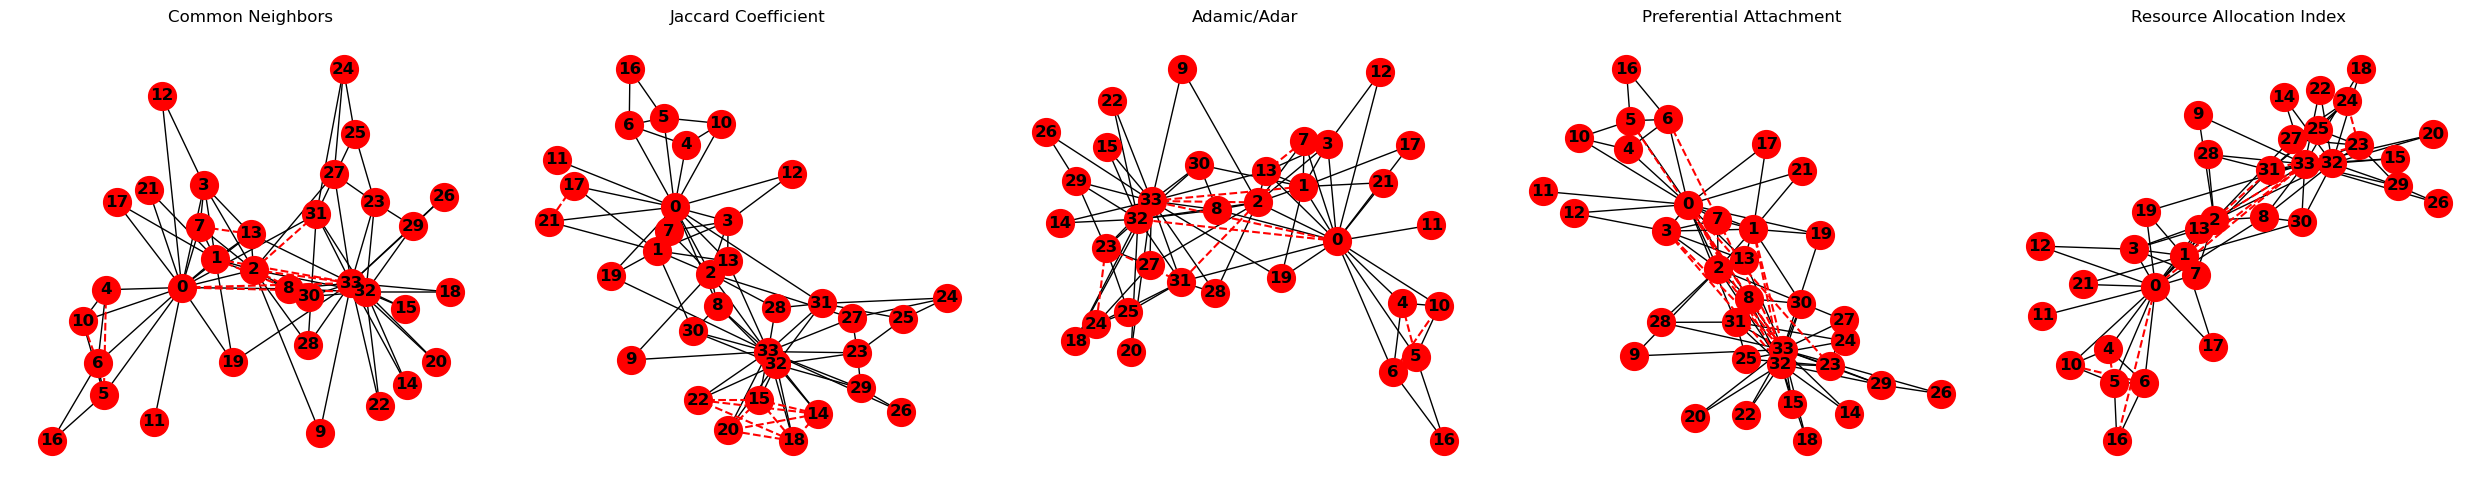

In [5]:
import networkx as nx
import matplotlib.pyplot as plt

# リンク予測指標のリストを初期化
CN = []  # 共通の近傍数
JC = []  # Jaccard係数
AA = []  # Adamic/Adar指数
PA = []  # 優先的アタッチメント
RA = []  # リソース配分インデックス
k = 10  # 上位k個の結果を表示

# カラテクラブグラフを生成
G = nx.karate_club_graph()

# グラフのノード数を取得
n = nx.number_of_nodes(G)

# すべてのノードペアに対してリンク予測指標を計算
for x in range(n):
    for y in range(x + 1, n):
        if not G.has_edge(x, y):  # エッジが存在しないノードペアに対して
            # 共通の近傍数を計算してリストに追加
            CN.append(tuple([x, y, len(list(nx.common_neighbors(G, x, y)))]))
            # Jaccard係数を計算してリストに追加
            JC.append(list(nx.jaccard_coefficient(G, [(x, y)]))[0])
            # Adamic/Adar指数を計算してリストに追加
            AA.append(list(nx.adamic_adar_index(G, [(x, y)]))[0])
            # 優先的アタッチメントスコアを計算してリストに追加
            PA.append(list(nx.preferential_attachment(G, [(x, y)]))[0])
            # リソース配分インデックスを計算してリストに追加
            RA.append(list(nx.resource_allocation_index(G, [(x, y)]))[0])

# リンク予測指標の結果を表示
print("Common Neighbors")
print(sorted(CN, key=lambda x: x[2], reverse=True)[:k])  # 共通の近傍数でソートして上位k個を表示
print("Jaccard Coefficient")
print(sorted(JC, key=lambda x: x[2], reverse=True)[:k])  # Jaccard係数でソートして上位k個を表示
print("Adamic/Adar")
print(sorted(AA, key=lambda x: x[2], reverse=True)[:k])  # Adamic/Adar指数でソートして上位k個を表示
print("Preferential Attachment")
print(sorted(PA, key=lambda x: x[2], reverse=True)[:k])  # 優先的アタッチメントスコアでソートして上位k個を表示
print("Resource Allocation Index")
print(sorted(RA, key=lambda x: x[2], reverse=True)[:k])  # リソース配分インデックスでソートして上位k個を表示

# 可視化のための関数
def plot_predicted_links(ax, G, predicted_links, title):
    pos = nx.spring_layout(G)
    nx.draw(G, pos, node_size=400, node_color="red", with_labels=True, font_weight='bold', ax=ax)
    
    for (u, v) in predicted_links:
        x = [pos[u][0], pos[v][0]]
        y = [pos[u][1], pos[v][1]]
        ax.plot(x, y, 'r--')
    
    ax.set_title(title)

# サブプロットで上位k個の予測リンクを可視化
fig, axs = plt.subplots(1, 5, figsize=(25, 5))

plot_predicted_links(axs[0], G, [(x, y) for (x, y, _) in sorted(CN, key=lambda x: x[2], reverse=True)[:k]], "Common Neighbors")
plot_predicted_links(axs[1], G, [(u, v) for (u, v, p) in sorted(JC, key=lambda x: x[2], reverse=True)[:k]], "Jaccard Coefficient")
plot_predicted_links(axs[2], G, [(u, v) for (u, v, p) in sorted(AA, key=lambda x: x[2], reverse=True)[:k]], "Adamic/Adar")
plot_predicted_links(axs[3], G, [(u, v) for (u, v, p) in sorted(PA, key=lambda x: x[2], reverse=True)[:k]], "Preferential Attachment")
plot_predicted_links(axs[4], G, [(u, v) for (u, v, p) in sorted(RA, key=lambda x: x[2], reverse=True)[:k]], "Resource Allocation Index")

plt.tight_layout()
plt.show()


Common Neighbors
[(2, 33, 6), (0, 33, 4), (7, 13, 4), (0, 32, 3), (1, 8, 3), (1, 33, 3), (2, 30, 3), (2, 31, 3), (4, 5, 3), (6, 10, 3)]
Jaccard Coefficient
[(14, 15, 1.0), (14, 18, 1.0), (14, 20, 1.0), (14, 22, 1.0), (15, 18, 1.0), (15, 20, 1.0), (15, 22, 1.0), (17, 21, 1.0), (18, 20, 1.0), (18, 22, 1.0)]
Adamic/Adar
[(2, 33, 4.719381261461351), (0, 33, 2.7110197222973085), (1, 33, 2.252921681630931), (4, 5, 1.9922605072935597), (6, 10, 1.9922605072935597), (7, 13, 1.8081984819901584), (2, 31, 1.6733425912309228), (23, 31, 1.6656249548734432), (23, 24, 1.631586747071319), (0, 32, 1.613740043014111)]
Preferential Attachment
[(0, 33, 272), (0, 32, 192), (2, 33, 170), (1, 33, 153), (1, 32, 108), (3, 33, 102), (0, 23, 80), (3, 32, 72), (5, 33, 68), (6, 33, 68)]
Resource Allocation Index
[(2, 33, 1.5666666666666664), (0, 33, 0.9), (1, 33, 0.7833333333333333), (4, 5, 0.6458333333333333), (6, 10, 0.6458333333333333), (23, 24, 0.5833333333333333), (25, 27, 0.5333333333333333), (0, 16, 0.5), (2

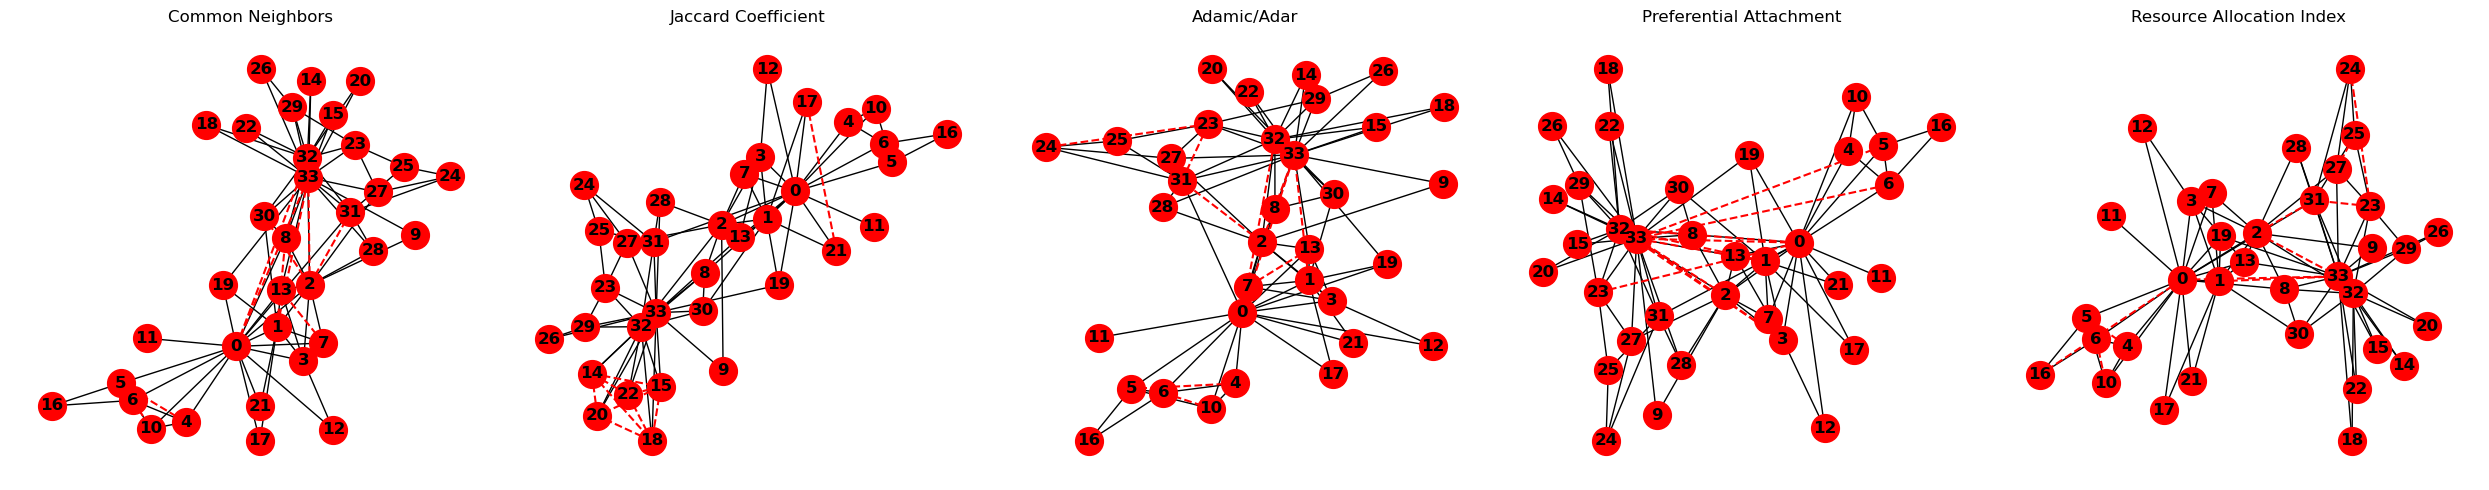

In [11]:
import networkx as nx
import matplotlib.pyplot as plt

# リンク予測指標のリストを初期化
CN = []  # 共通の近傍数
JC = []  # Jaccard係数
AA = []  # Adamic/Adar指数
PA = []  # 優先的アタッチメント
RA = []  # リソース配分インデックス
k = 10  # 上位k個の結果を表示

# カラテクラブグラフを生成
G = nx.karate_club_graph()

# グラフのノード数を取得
n = nx.number_of_nodes(G)

# すべてのノードペアに対してリンク予測指標を計算
for x in range(n):
    for y in range(x + 1, n):
        if not G.has_edge(x, y):  # エッジが存在しないノードペアに対して
            # 共通の近傍数を計算してリストに追加
            CN.append(tuple([x, y, len(list(nx.common_neighbors(G, x, y)))]))
            # Jaccard係数を計算してリストに追加
            JC.append(list(nx.jaccard_coefficient(G, [(x, y)]))[0])
            # Adamic/Adar指数を計算してリストに追加
            AA.append(list(nx.adamic_adar_index(G, [(x, y)]))[0])
            # 優先的アタッチメントスコアを計算してリストに追加
            PA.append(list(nx.preferential_attachment(G, [(x, y)]))[0])
            # リソース配分インデックスを計算してリストに追加
            RA.append(list(nx.resource_allocation_index(G, [(x, y)]))[0])

# リンク予測指標の結果を表示
print("Common Neighbors")
CN_top = sorted(CN, key=lambda x: x[2], reverse=True)[:k]  # 共通の近傍数でソートして上位k個を表示
print(CN_top)

print("Jaccard Coefficient")
JC_top = sorted(JC, key=lambda x: x[2], reverse=True)[:k]  # Jaccard係数でソートして上位k個を表示
print(JC_top)

print("Adamic/Adar")
AA_top = sorted(AA, key=lambda x: x[2], reverse=True)[:k]  # Adamic/Adar指数でソートして上位k個を表示
print(AA_top)

print("Preferential Attachment")
PA_top = sorted(PA, key=lambda x: x[2], reverse=True)[:k]  # 優先的アタッチメントスコアでソートして上位k個を表示
print(PA_top)

print("Resource Allocation Index")
RA_top = sorted(RA, key=lambda x: x[2], reverse=True)[:k]  # リソース配分インデックスでソートして上位k個を表示
print(RA_top)

# 重複するノードペアを特定して表示
def find_common_pairs(*lists):
    pairs = {}
    for l in lists:
        for pair in l:
            node_pair = (pair[0], pair[1])
            if node_pair in pairs:
                pairs[node_pair] += 1
            else:
                pairs[node_pair] = 1
    return [pair for pair, count in pairs.items() if count > 1]

common_pairs = find_common_pairs(CN_top, JC_top, AA_top, PA_top, RA_top)
print("Common Pairs Across Metrics:")
print(common_pairs)

# 可視化のための関数
def plot_predicted_links(ax, G, predicted_links, title):
    pos = nx.spring_layout(G)
    nx.draw(G, pos, node_size=400, node_color="red", with_labels=True, font_weight='bold', ax=ax)
    
    for (u, v) in predicted_links:
        x = [pos[u][0], pos[v][0]]
        y = [pos[u][1], pos[v][1]]
        ax.plot(x, y, 'r--')
    
    ax.set_title(title)

# サブプロットで上位k個の予測リンクを可視化
fig, axs = plt.subplots(1, 5, figsize=(25, 5))

plot_predicted_links(axs[0], G, [(x, y) for (x, y, _) in CN_top], "Common Neighbors")
plot_predicted_links(axs[1], G, [(u, v) for (u, v, p) in JC_top], "Jaccard Coefficient")
plot_predicted_links(axs[2], G, [(u, v) for (u, v, p) in AA_top], "Adamic/Adar")
plot_predicted_links(axs[3], G, [(u, v) for (u, v, p) in PA_top], "Preferential Attachment")
plot_predicted_links(axs[4], G, [(u, v) for (u, v, p) in RA_top], "Resource Allocation Index")

plt.tight_layout()
plt.show()


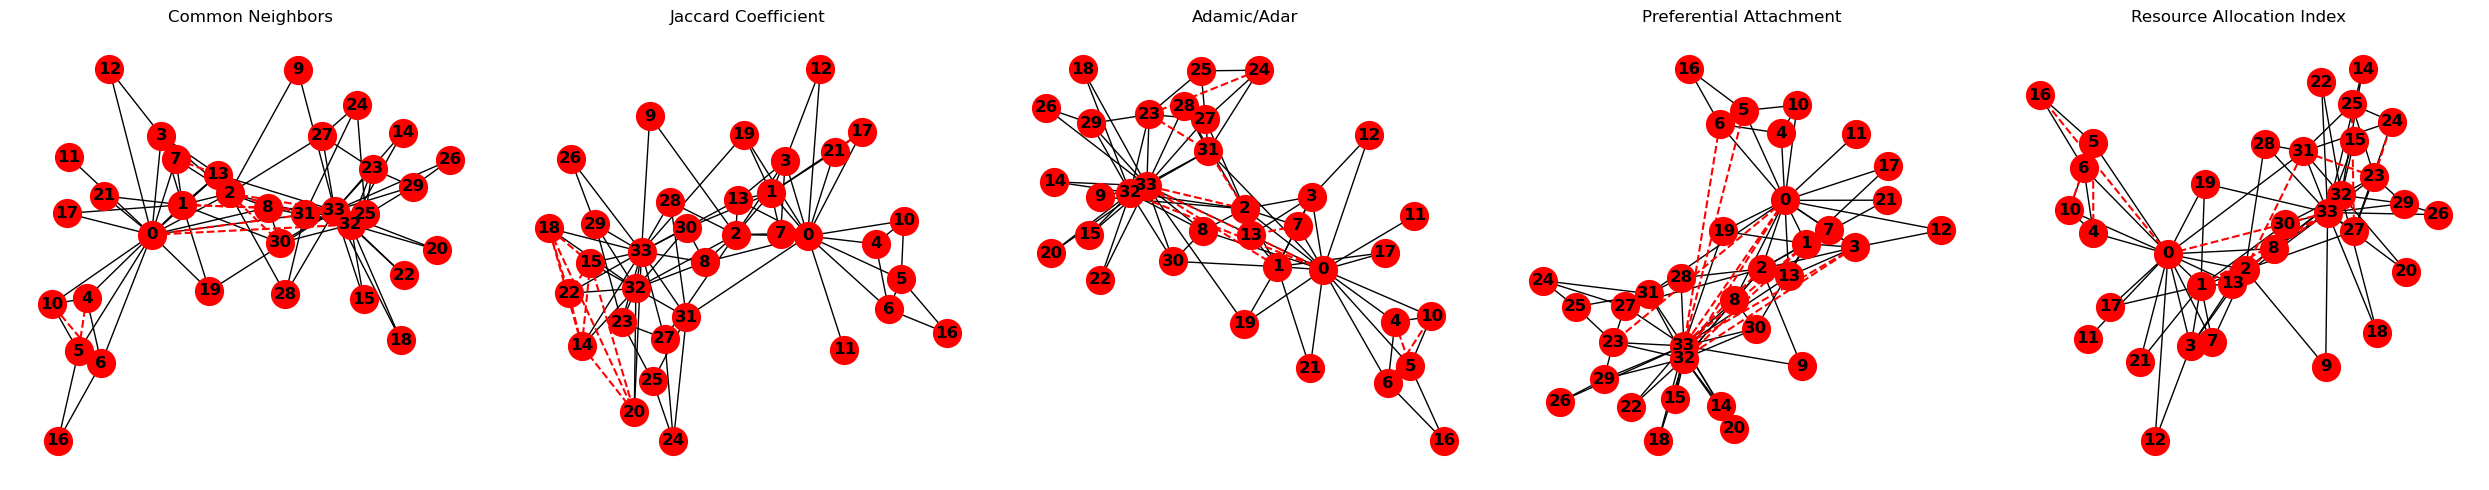

(2, 33):

Common Neighbors
Adamic/Adar
Preferential Attachment
Resource Allocation Index

(0, 33):

Common Neighbors
Adamic/Adar
Preferential Attachment
Resource Allocation Index

(7, 13):

Common Neighbors
Adamic/Adar

(0, 32):

Common Neighbors
Adamic/Adar
Preferential Attachment

(1, 33):

Common Neighbors
Adamic/Adar
Preferential Attachment
Resource Allocation Index

(2, 31):

Common Neighbors
Adamic/Adar
Resource Allocation Index

(4, 5):

Common Neighbors
Adamic/Adar
Resource Allocation Index

(6, 10):

Common Neighbors
Adamic/Adar
Resource Allocation Index

(23, 31):

Adamic/Adar
Resource Allocation Index

(23, 24):

Adamic/Adar
Resource Allocation Index



In [9]:
import networkx as nx
import matplotlib.pyplot as plt

# リンク予測指標のリストを初期化
CN = []  # 共通の近傍数
JC = []  # Jaccard係数
AA = []  # Adamic/Adar指数
PA = []  # 優先的アタッチメント
RA = []  # リソース配分インデックス
k = 10  # 上位k個の結果を表示

# カラテクラブグラフを生成
G = nx.karate_club_graph()

# グラフのノード数を取得
n = nx.number_of_nodes(G)

# すべてのノードペアに対してリンク予測指標を計算
for x in range(n):
    for y in range(x + 1, n):
        if not G.has_edge(x, y):  # エッジが存在しないノードペアに対して
            # 共通の近傍数を計算してリストに追加
            CN.append(tuple([x, y, len(list(nx.common_neighbors(G, x, y)))]))
            # Jaccard係数を計算してリストに追加
            JC.append(list(nx.jaccard_coefficient(G, [(x, y)]))[0])
            # Adamic/Adar指数を計算してリストに追加
            AA.append(list(nx.adamic_adar_index(G, [(x, y)]))[0])
            # 優先的アタッチメントスコアを計算してリストに追加
            PA.append(list(nx.preferential_attachment(G, [(x, y)]))[0])
            # リソース配分インデックスを計算してリストに追加
            RA.append(list(nx.resource_allocation_index(G, [(x, y)]))[0])

# リンク予測指標の結果を表示
CN_top = sorted(CN, key=lambda x: x[2], reverse=True)[:k]  # 共通の近傍数でソートして上位k個を表示
JC_top = sorted(JC, key=lambda x: x[2], reverse=True)[:k]  # Jaccard係数でソートして上位k個を表示
AA_top = sorted(AA, key=lambda x: x[2], reverse=True)[:k]  # Adamic/Adar指数でソートして上位k個を表示
PA_top = sorted(PA, key=lambda x: x[2], reverse=True)[:k]  # 優先的アタッチメントスコアでソートして上位k個を表示
RA_top = sorted(RA, key=lambda x: x[2], reverse=True)[:k]  # リソース配分インデックスでソートして上位k個を表示

# 重複するノードペアを特定して表示
def find_common_pairs(*lists):
    pairs = {}
    for metric_name, l in lists:
        for pair in l:
            node_pair = (pair[0], pair[1])
            if node_pair not in pairs:
                pairs[node_pair] = []
            pairs[node_pair].append(metric_name)
    return pairs

metrics = [
    ("Common Neighbors", CN_top),
    ("Jaccard Coefficient", JC_top),
    ("Adamic/Adar", AA_top),
    ("Preferential Attachment", PA_top),
    ("Resource Allocation Index", RA_top)
]

common_pairs = find_common_pairs(*metrics)
common_pairs_filtered = {k: v for k, v in common_pairs.items() if len(v) > 1}

# 可視化のための関数
def plot_predicted_links(ax, G, predicted_links, title):
    pos = nx.spring_layout(G)
    nx.draw(G, pos, node_size=400, node_color="red", with_labels=True, font_weight='bold', ax=ax)
    
    for (u, v) in predicted_links:
        x = [pos[u][0], pos[v][0]]
        y = [pos[u][1], pos[v][1]]
        ax.plot(x, y, 'r--')
    
    ax.set_title(title)

# サブプロットで上位k個の予測リンクを可視化
fig, axs = plt.subplots(1, 5, figsize=(25, 5))

plot_predicted_links(axs[0], G, [(x, y) for (x, y, _) in CN_top], "Common Neighbors")
plot_predicted_links(axs[1], G, [(u, v) for (u, v, p) in JC_top], "Jaccard Coefficient")
plot_predicted_links(axs[2], G, [(u, v) for (u, v, p) in AA_top], "Adamic/Adar")
plot_predicted_links(axs[3], G, [(u, v) for (u, v, p) in PA_top], "Preferential Attachment")
plot_predicted_links(axs[4], G, [(u, v) for (u, v, p) in RA_top], "Resource Allocation Index")

plt.tight_layout()
plt.show()

# 重複するノードペアを指定された形式で表示
for pair, metrics in common_pairs_filtered.items():
    print(f"{pair}:\n")
    for metric in metrics:
        print(metric)
    print("")


## ランダムウォークとWord2Vecによる可視化
このスクリプトは、空手クラブのソーシャルネットワークを対象に、ランダムウォークとWord2Vecモデルを用いて各ノードを2次元ベクトル空間に埋め込むことを目的としています。

ランダムウォークは、確率的なプロセスで特定の始点から始まり、一連のステップを経てランダムに移動します。このスクリプトでは、各ノードから始めて、確率的に隣接するノードに移動するプロセスを100回繰り返し、系列データを生成します。これによりグラフ上のノード間の関係性を捉えたデータが収集されます。

Word2Vecは、この収集された系列データを用いて各ノードの分散表現を学習します。各ノードを表現する埋め込みベクトルの次元数や、与えられたターゲットノードの周囲にどれだけの隣接ノードを考慮するかを制御するウィンドウサイズなどのパラメータは、解析の対象となるデータや目的に応じて調整する必要があります。<br>

スクリプトの具体的な手順は以下の通りです。<br>

**1. ランダムウォークの生成**<br>
グラフ内の各ノードからスタートしてランダムに隣接するノードを選択して系列データを生成します。この操作を100回繰り返し、それぞれの系列データを収集します。ランダムウォークの関数は、第１引数はネットワーク、第２引数はランダムウォークの回数、第３引数はランダムウォークの長さです。これらのパラメータは、解析の対象となるデータや目的に応じて調整する必要があります。<br>
**2. Word2Vecモデルの学習**<br>
収集された系列データを用いてWord2Vecモデルを学習させます。Word2Vecは、与えられた系列データから各ノードを表す埋め込みベクトルを生成する手法です。パラメータとして、各ノードを表現する埋め込みベクトルの次元数や、与えられたターゲットノードの周囲にどれだけの隣接ノードを考慮するかを制御するウィンドウサイズがあります。<br>
**3. 2次元ベクトルの可視化**<br>
2次元のベクトル表現を取り出し、各ノードをグラフ上にプロットします。各ノードはグラフ上の位置に対応し、そのラベルはプロットされた位置に応じて表示されます。同時に、ノードが所属する空手クラブの派閥に応じて赤色または青色でノードを区別します。<br>

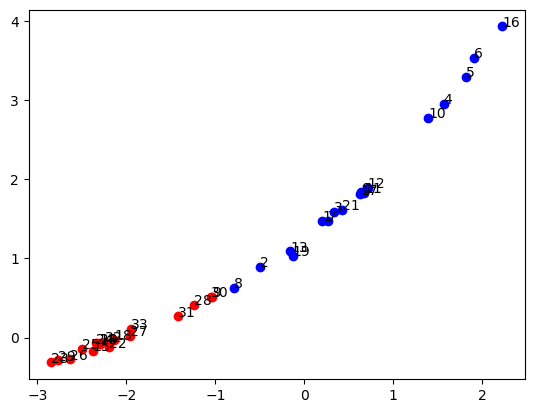

In [3]:
import networkx as nx  
import matplotlib.pyplot as plt  
import random  
from gensim.models import Word2Vec  # GensimのWord2Vecをインポートして単語ベクトルを学習します

def make_random_walks(G, num_of_walk, length_of_walk):
    """
    グラフGに対してランダムウォークを生成する関数。
    
    パラメータ:
    G: グラフ (NetworkXグラフオブジェクト)
    num_of_walk: 各ノードから行うウォークの回数
    length_of_walk: 各ウォークの長さ
    
    戻り値:
    walks: ランダムウォークのリスト。各ウォークはノードのリスト。
    """
    walks = list()
    for i in range(num_of_walk):
        node_list = list(G.nodes())
        for node in node_list:
            current_node = node
            walk = list()
            walk.append(str(node))
            for j in range(length_of_walk):
                next_node = random.choice(list(G.neighbors(current_node)))
                walk.append(str(next_node))
                current_node = next_node
            walks.append(walk)
    return walks

# カラテクラブグラフを生成
G = nx.karate_club_graph()

# グラフGに対してランダムウォークを生成
walks = make_random_walks(G, 100, 20)

# ランダムウォークからWord2Vecモデルを学習
model = Word2Vec(walks, min_count=0, vector_size=2, window=5, workers=1)

# 各ノードの座標と色を保存するリストを初期化
x = list()
y = list()
node_list = list()
colors = list()

# 描画のための図と軸を作成
fig, ax = plt.subplots()

# 各ノードのベクトル表現を取得し、プロット
for node in G.nodes():
    vector = model.wv[str(node)]
    x.append(vector[0])
    y.append(vector[1])
    ax.annotate(str(node), (vector[0], vector[1]))  # ノードのラベルをプロット
    if G.nodes[node]["club"] == "Officer":
        colors.append("r")  # Officerクラブのノードを赤色に設定
    else:
        colors.append("b")  # 他のノードを青色に設定

# 各ノードをプロット
for i in range(len(x)):
    ax.scatter(x[i], y[i], c=colors[i])

# グラフを表示
plt.show()


## ユークリッド距離によるリンク予測
このスクリプトでは、まずカラテクラブグラフを生成し、各ノードからランダムウォークを行います。<br>
次に、これらのウォークを使用してWord2Vecモデルを学習し、グラフのノードをベクトル空間に埋め込みます。学習したモデルから各ノードのベクトル表現を取得し、エッジが存在しないノードペア間の**ユークリッド距離**を計算します。この距離に基づいてリンクを予測を行うことでネットワーク内の未発見の関係性を見つけることができます。<br>
予測結果は距離が短い順にソートされ、トップ10のペアが表示されます。これにより潜在的な新しいリンクを特定し、ネットワークの構造をより深く理解することができます。<br>

1. **ランダムウォークの生成**<br>
・ make_random_walks関数がグラフからランダムウォークを生成しています。引数としてグラフG、ウォークの回数、および各ウォークの長さが与えられています。<br>
<br>
2. **Word2Vecによる学習**<br>
・ Word2Vecモデルを使用して、収集したランダムウォークデータからノードの埋め込みベクトルを学習しています。モデルのパラメータとして、ベクトルの次元数（vector_size）が5と指定されています。<br>
<br>
3. **ユークリッド距離の計算**<br> 
・ 学習した埋め込みベクトルを用いて、グラフ内のエッジが存在しないノードペアのユークリッド距離を計算し、リンク予測を行っています。距離が短いペアほど新たにリンクが形成される可能性が高いと予測されています。<br>
<br>
4. **テストセットでの評価** <br>
・ リンク予測の精度を計算しています。これは、実際のネットワークから一部のエッジを隠しており（G_train）、予測されたリンクと実際のリンクとを比較して精度を評価しています。<br>

**hoge:**[-*.*******   *.*******  *.*******  -*.******** -*.******* ]**：**ネットワーク内の各ノードの埋め込みベクトルを表しています。<br>
**Link prediction based on network embedding：** 各ノードの埋め込みベクトルから算出された距離です。<br>
**Accuracy: hogehoge：**リンク予測の精度を示しています。具体的には、実際のネットワークから一部のエッジを隠した状態で、予測されたリンクと実際のリンクとを比較し、正しく予測されたリンクの割合を表しています。この精度は、予測されたリンクが実際のネットワークの非表示エッジと一致した割合を示しており、0から1の間の値で表されます。<br>

In [1]:
import networkx as nx
import numpy as np
import random
from gensim.models import Word2Vec
from sklearn.metrics import accuracy_score

def make_random_walks(G, num_of_walk, length_of_walk):
    """
    グラフGに対してランダムウォークを生成する関数。
    
    パラメータ:
    G: グラフ (NetworkXグラフオブジェクト)
    num_of_walk: 各ノードから行うウォークの回数
    length_of_walk: 各ウォークの長さ
    
    戻り値:
    walks: ランダムウォークのリスト。各ウォークはノードのリスト。
    """
    walks = list()
    for i in range(num_of_walk):
        node_list = list(G.nodes())
        for node in node_list:
            current_node = node
            walk = list()
            walk.append(str(node))
            for j in range(length_of_walk):
                next_node = random.choice(list(G.neighbors(current_node)))
                walk.append(str(next_node))
                current_node = next_node
            walks.append(walk)
    return walks

# カラテクラブグラフを生成
G = nx.karate_club_graph()

# 一部のエッジを隠す（リンク予測のテスト用）
G_train = G.copy()
edges_to_remove = random.sample(list(G.edges()), int(0.1 * len(G.edges())))
G_train.remove_edges_from(edges_to_remove)

# グラフGに対してランダムウォークを生成
walks = make_random_walks(G_train, 100, 20)

# ランダムウォークからWord2Vecモデルを学習
model = Word2Vec(walks, vector_size=5, window=5, min_count=0, workers=1)

# 各ノードのベクトル表現を保存するリストを初期化
vlist = list()

# 各ノードのベクトル表現を取得し、コンソールに出力
for node in G.nodes():
    vector = model.wv[str(node)]
    print(f"{node}: {vector}")
    vlist.append(vector)

# エッジが存在しないノードペア間の距離を計算し、リンク予測を行う
DW = []
k = 10  # リンク予測するトップkのペア
n = nx.number_of_nodes(G)  # グラフのノード数を取得
for x in range(n):
    for y in range(x + 1, n):
        if not G.has_edge(x, y):
            DW.append((x, y, np.linalg.norm(vlist[x] - vlist[y])))

# リンク予測結果を出力
DW_sorted = sorted(DW, key=lambda x: x[2], reverse=False)[:k]
print("Link prediction based on network embedding:")
for (u, v, dist) in DW_sorted:
    print(f"Node pair ({u}, {v}) with distance {dist:.4f}")

# 精度の計算
predicted_links = [(u, v) for (u, v, dist) in DW_sorted]
true_links = [(u, v) for (u, v) in edges_to_remove]
all_links = list(G.edges()) + predicted_links

# ラベルを作成
y_true = [1 if edge in true_links else 0 for edge in all_links]
y_pred = [1 if edge in predicted_links else 0 for edge in all_links]

accuracy = accuracy_score(y_true, y_pred)
print(f"Accuracy: {accuracy:.4f}")


0: [-0.9966287 -0.1702874  1.3246409 -1.4356835  0.780976 ]
1: [-0.43807408 -0.34182754  2.124125   -0.63044924 -0.18322961]
2: [-0.30594397  0.90123415  1.1083518  -0.27350065 -0.9649837 ]
3: [-0.866311    0.29414853  2.0007384  -0.76759017 -1.0493788 ]
4: [-1.2120922  -0.12934077  0.7588083  -2.3752244   2.0090802 ]
5: [-0.9648428  -0.0728661   0.48644787 -2.3752704   2.5780473 ]
6: [-0.88245463 -0.1617651   0.43928412 -2.5763469   2.481803  ]
7: [-0.7992553   0.00967208  1.9892093  -0.59890074 -0.5195364 ]
8: [ 0.84050727  0.51987725  0.5292763  -0.02573767  0.5080919 ]
9: [ 0.6067751   1.0079067   0.8782734   0.4471453  -0.47506848]
10: [-1.0351908   0.07147936  0.46768108 -2.6112702   1.8931149 ]
11: [-0.8568947  -0.06329063  1.1354969  -1.44216     0.88910586]
12: [-1.1533288   0.32626948  2.4758768  -0.954086   -1.4872702 ]
13: [-0.18922837  0.4567389   1.3596457  -0.31607616 -0.5596174 ]
14: [1.5685258  1.2924079  0.20643006 0.91769934 0.59678745]
15: [1.5374992  1.2438934  0.2

Accuracy: 0.8068


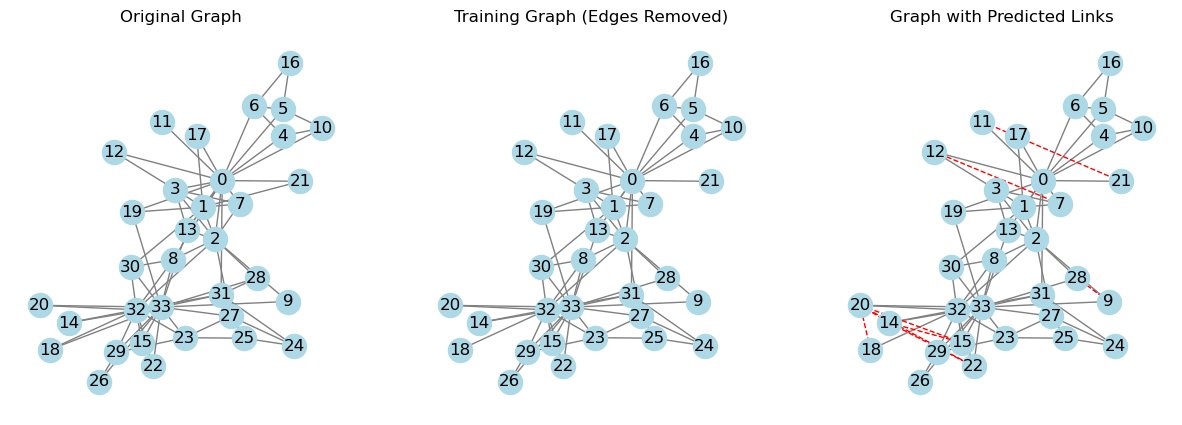

In [1]:
import networkx as nx
import numpy as np
import random
from gensim.models import Word2Vec
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

def make_random_walks(G, num_of_walk, length_of_walk):
    walks = []
    for i in range(num_of_walk):
        node_list = list(G.nodes())
        for node in node_list:
            current_node = node
            walk = [str(node)]
            for j in range(length_of_walk):
                next_node = random.choice(list(G.neighbors(current_node)))
                walk.append(str(next_node))
                current_node = next_node
            walks.append(walk)
    return walks

# カラテクラブグラフを生成
G = nx.karate_club_graph()

# 一部のエッジを隠す（リンク予測のテスト用）
G_train = G.copy()
edges_to_remove = random.sample(list(G.edges()), int(0.1 * len(G.edges())))
G_train.remove_edges_from(edges_to_remove)

# グラフGに対してランダムウォークを生成
walks = make_random_walks(G_train, 100, 20)

# ランダムウォークからWord2Vecモデルを学習
model = Word2Vec(walks, vector_size=5, window=5, min_count=0, workers=1)

# 各ノードのベクトル表現を保存するリストを初期化
vlist = [model.wv[str(node)] for node in G.nodes()]

# エッジが存在しないノードペア間の距離を計算し、リンク予測を行う
DW = []
k = 10  # リンク予測するトップkのペア
n = nx.number_of_nodes(G)
for x in range(n):
    for y in range(x + 1, n):
        if not G.has_edge(x, y):
            DW.append((x, y, np.linalg.norm(vlist[x] - vlist[y])))

# リンク予測結果を出力
DW_sorted = sorted(DW, key=lambda x: x[2], reverse=False)[:k]
predicted_links = [(u, v) for (u, v, dist) in DW_sorted]

# 精度の計算
true_links = [(u, v) for (u, v) in edges_to_remove]
all_links = list(G.edges()) + predicted_links

# ラベルを作成
y_true = [1 if edge in true_links else 0 for edge in all_links]
y_pred = [1 if edge in predicted_links else 0 for edge in all_links]

accuracy = accuracy_score(y_true, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# 可視化
pos = nx.spring_layout(G)

plt.figure(figsize=(15, 5))

# 元のグラフ
plt.subplot(1, 3, 1)
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray')
plt.title("Original Graph")

# トレーニンググラフ
plt.subplot(1, 3, 2)
nx.draw(G_train, pos, with_labels=True, node_color='lightblue', edge_color='gray')
plt.title("Training Graph (Edges Removed)")

# 予測リンクを含むグラフ
plt.subplot(1, 3, 3)
nx.draw(G_train, pos, with_labels=True, node_color='lightblue', edge_color='gray')
nx.draw_networkx_edges(G, pos, edgelist=predicted_links, edge_color='red', style='dashed')
plt.title("Graph with Predicted Links")

plt.show()


## ランダムフォレストによるリンク予測
ランダムフォレストは、機械学習におけるアンサンブル学習の一種であり、複数の決定木を組み合わせて予測精度を高める手法です。この方法は、回帰や分類の問題に広く利用されています。ランダムフォレストの主要な特徴とメリットを以下に説明します。<br>

**基本原理：**<br>
**・アンサンブル学習**<br>
ランダムフォレストは、多数の決定木を組み合わせて予測精度と汎化性能を向上させます。各決定木は独立して学習し、最終的な予測は各木の予測結果の平均や多数決で決まります。<br>
**・ブートストラップサンプリング**<br>
各決定木は元のデータセットからブートストラップサンプリング（復元抽出）で得られたサブセットを用いて学習します。これにより、各決定木が異なるデータサブセットに基づいて学習され、多様性が生まれます。<br>
**・ランダム特徴選択**<br>
各決定木の分割時に、全ての特徴量の中からランダムに選ばれた一部の特徴量だけを考慮します。これにより、決定木同士の相関が低くなり、全体のアンサンブル性能が向上します。<br>

**ランダムフォレストのメリット：**<br>
**・高い予測精度**<br>
単一の決定木と比較して、ランダムフォレストは高い予測精度を持ち、過学習（オーバーフィッティング）のリスクが低いです。多数の決定木の予測結果を組み合わせることで、ノイズや異常値の影響が軽減されます。<br>
**・汎化性能の向上**<br>
ランダムフォレストは、モデルの複雑さを増やすことなく、汎化性能を向上させることができます。多様な決定木の集合によって、未知のデータに対する予測能力が高まります。<br>
**・頑健性**<br>
ノイズや欠損値に対しても比較的頑健です。ブートストラップサンプリングと特徴選択によって、個々の決定木が異なる部分集合に基づいて学習されるため、一部のデータの異常値が全体のモデルに与える影響が小さくなります。<br>
**・特徴量の重要度の評価**<br>
ランダムフォレストは、特徴量の重要度を評価する手段も提供します。各決定木の分割における特徴量の使用頻度や情報ゲインに基づいて、どの特徴量が予測において重要であるかを定量的に示すことができます。<br>
<br>
<br>
このスクリプトではカラテクラブグラフを生成し、ノードペアのリンクの有無を予測するために各ノードペアについて特徴量を計算します。具体的にはリンクが存在するエッジと存在しないノードペアについて、共通の隣接ノードの数、ジャッカード係数、アダミック・アダー指標、優先的アタッチメントの4つの特徴量を算出します。

次に、これらの特徴量と対応するラベル（リンクが存在する場合は1、存在しない場合は0）を用いて、データセットを作成します。このデータセットを訓練データとテストデータに分割し、ランダムフォレスト分類器を訓練します。最終的にテストデータに対する予測を行い精度を計算します。この方法を通じてネットワーク内のリンク予測を行い、リンクの有無を正確に予測することができます。<br>

1. **データセットの生成：**<br>
・ ノードペアを特徴量として X に格納しています。これはネットワーク全体のエッジの可能性を表しています。<br>
・ y は対応するラベルで、各ノードペアが実際にエッジで結ばれているかどうかを示します。（1: リンクあり、0: リンクなし）<br>
<br>
2. **訓練セットとテストセットの分割：**<br>
・ train_test_split を使用してデータを訓練セットとテストセットに分割しています。<br>
<br>
3. **ランダムフォレストモデルの訓練：**<br>
・ RandomForestClassifier を使ってランダムフォレストモデルを訓練しています。n_estimators は決定木の数を表し、ここでは100本の決定木を使用しています。<br>
<br>
4. **テストセットでの評価：**<br>
・ テストセットで予測を行い、accuracy_score を使って予測の精度を評価しています。<br>
・ 予測されたリンクが存在するノードペアを表示します。

Accuracy: 0.8495575221238938
Predicted links:
Node pair (29, 33) has link.
Node pair (26, 33) has link.
Node pair (0, 7) has link.
Node pair (13, 32) has link.
Node pair (0, 3) has link.
Node pair (30, 33) has link.
Node pair (30, 32) has link.
Node pair (15, 33) has link.
Node pair (24, 31) has link.
Node pair (0, 10) has link.
Node pair (28, 32) has link.
Node pair (2, 13) has link.
Node pair (1, 32) has link.
Node pair (1, 2) has link.


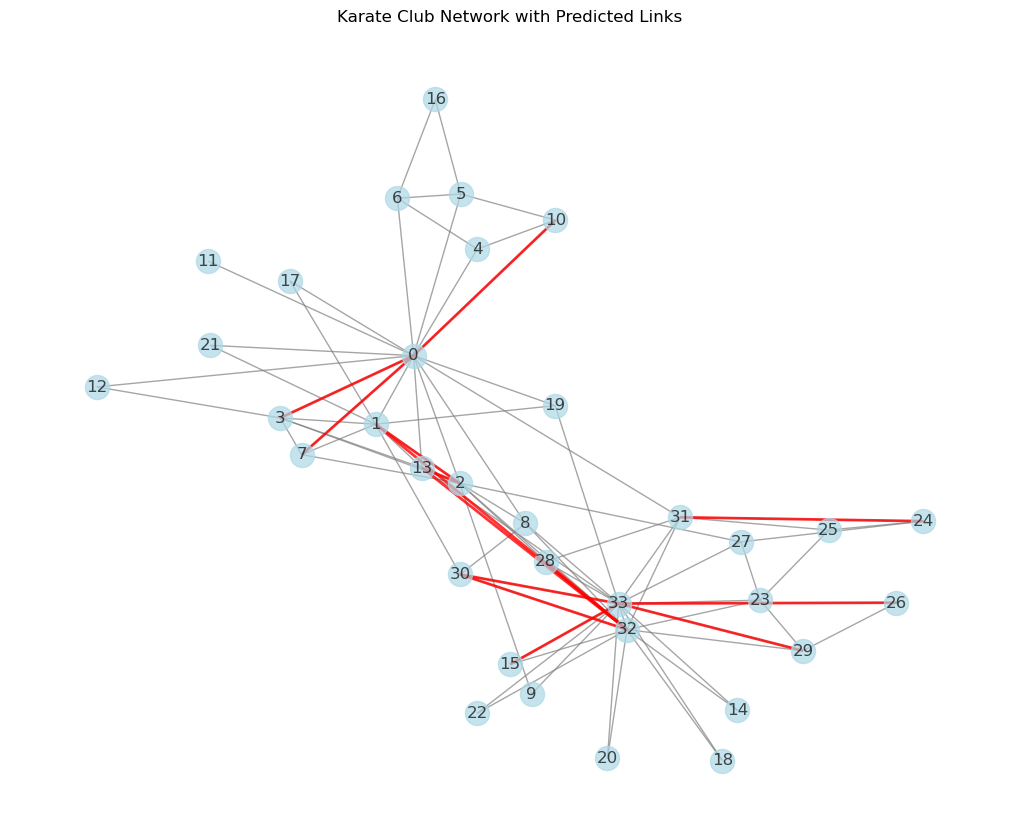

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 空手クラブのデータセットをロード
G = nx.karate_club_graph()

# 特徴量とラベルの生成
X = []
y = []
node_pairs = []
for i in range(len(G.nodes())):
    for j in range(i + 1, len(G.nodes())):
        # 特徴量を計算する
        common_neighbors = len(list(nx.common_neighbors(G, i, j)))
        jaccard = list(nx.jaccard_coefficient(G, [(i, j)]))[0][2]
        adamic_adar = list(nx.adamic_adar_index(G, [(i, j)]))[0][2]
        preferential_attachment = list(nx.preferential_attachment(G, [(i, j)]))[0][2]

        # 特徴量をリストに追加
        X.append([common_neighbors, jaccard, adamic_adar, preferential_attachment])
        
        # ノードペアをリストに追加
        node_pairs.append((i, j))
        
        # ラベルをリストに追加
        if G.has_edge(i, j):
            y.append(1)  # リンクが存在する場合
        else:
            y.append(0)  # リンクが存在しない場合

# データセットを訓練セットとテストセットに分割
X_train, X_test, y_train, y_test, node_pairs_train, node_pairs_test = train_test_split(X, y, node_pairs, test_size=0.2, random_state=42)

# ランダムフォレストモデルの訓練
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# テストセットでの予測と評価
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# テストセットで予測されたリンクが存在するノードペアを取得
predicted_links = []
for idx, pred in enumerate(y_pred):
    if pred == 1:
        predicted_links.append(node_pairs_test[idx])

# テストセットで予測されたリンクの結果を表示
print("Predicted links:")
for (node_u, node_v) in predicted_links:
    print(f"Node pair ({node_u}, {node_v}) has link.")

# ネットワークグラフの描画
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G, seed=42)  # グラフのレイアウトを設定

# 全てのエッジを描画
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', width=1.0, alpha=0.7)

# 予測されたリンクを強調表示
nx.draw_networkx_edges(G, pos, edgelist=predicted_links, edge_color='red', width=2.0, alpha=0.8)

plt.title('Karate Club Network with Predicted Links')
plt.show()


Pytorchがインストール出来る方は、より精緻なGraph Neural Network（GNN）による予測を試してみてください。
GNNのトレーニングは計算コストが高い場合が多いのでご自身のPC環境に注意が必要です。
1. NVIDIAのCUDA対応のGPUを用意し、適切なCUDAバージョンをインストールします。<br>
2. グラフデータはノードやエッジの数が多いと大量のメモリを消費します。十分なRAMを確保することが重要です。
3. GPUメモリ（VRAM）の容量も重要です。ノード数が数十万以上の大規模なグラフを扱う場合はVRAMが16GB以上のGPUを推奨。

In [2]:
import torch
import torch.nn.functional as F
from torch_geometric.nn import GCNConv
from torch_geometric.utils import from_networkx, train_test_split_edges, negative_sampling
import networkx as nx
from sklearn.metrics import roc_auc_score

# NetworkXで空手クラブグラフを作成
G = nx.karate_club_graph()
data = from_networkx(G)

# グラフをリンク予測用に分割
data = train_test_split_edges(data)

class GCN(torch.nn.Module):
    def __init__(self, in_channels, out_channels):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(in_channels, 16)
        self.conv2 = GCNConv(16, out_channels)

    def encode(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = self.conv2(x, edge_index)
        return x

    def decode(self, z, pos_edge_index, neg_edge_index):
        edge_index = torch.cat([pos_edge_index, neg_edge_index], dim=-1)
        logits = (z[edge_index[0]] * z[edge_index[1]]).sum(dim=1)
        return logits

    def decode_all(self, z):
        prob_adj = z @ z.t()
        return prob_adj

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = GCN(data.num_features, 16).to(device)
data = data.to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)

def train():
    model.train()
    optimizer.zero_grad()
    z = model.encode(data.x, data.train_pos_edge_index)
    neg_edge_index = negative_sampling(
        edge_index=data.train_pos_edge_index, num_nodes=data.num_nodes,
        num_neg_samples=data.train_pos_edge_index.size(1))
    logits = model.decode(z, data.train_pos_edge_index, neg_edge_index)
    labels = torch.cat([torch.ones(data.train_pos_edge_index.size(1)),
                        torch.zeros(neg_edge_index.size(1))], dim=0).to(device)
    loss = F.binary_cross_entropy_with_logits(logits, labels)
    loss.backward()
    optimizer.step()
    return loss

def test():
    model.eval()
    z = model.encode(data.x, data.train_pos_edge_index)
    pos_edge_index = data.test_pos_edge_index
    neg_edge_index = data.test_neg_edge_index
    logits = model.decode(z, pos_edge_index, neg_edge_index)
    labels = torch.cat([torch.ones(pos_edge_index.size(1)),
                        torch.zeros(neg_edge_index.size(1))], dim=0).to(device)
    auc = roc_auc_score(labels.cpu().numpy(), logits.detach().cpu().numpy())
    return auc

for epoch in range(1, 101):
    loss = train()
    print(f'Epoch: {epoch:03d}, Loss: {loss:.4f}')

auc = test()
print(f'AUC: {auc:.4f}')


ModuleNotFoundError: No module named 'torch'

## 蛇足：二部グラフからリンクを予測する
以下のスクリプトは･･･ネットワークグラフからかけ離れた予測モデルが出来た･･･

In [6]:
import lightgbm as lgb
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# ダミーデータの作成
X = np.random.rand(100, 10)
y = np.random.rand(100)

# データの分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# データセットの作成
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

# ハイパーパラメータの設定
params = {
    'objective': 'regression',
    'metric': 'mse',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'early_stopping_round': 5  # early stopping roundをparamsに設定
}

# モデルの訓練
gbm = lgb.train(params, train_data, num_boost_round=20, valid_sets=test_data)

# 予測
y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration)

# 平均二乗誤差の計算
mse = mean_squared_error(y_test, y_pred)
print(f'モデルの平均二乗誤差 (MSE): {mse}')


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000077 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 280
[LightGBM] [Info] Number of data points in the train set: 80, number of used features: 10
[LightGBM] [Info] Start training from score 0.521563
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 5 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [W